# IS 362 Final Project: IMDB Top 250 Movie Ratings

In this project, I'll use web scraping with BeautifulSoup to get IMDB's top 250 list of movies. I'll parse the data to create a list, and then use pandas to create a dataframe object with columns from that list. That list will be used to create a neat .csv file of the movies with only the columns needed.

_Note: I had originally planned to use IMDB's API to get some data, but didn't want to sign up for a subscription to get access._

When I proposed this project, I had intended to use the IMDB ratings by demographic data to get some info about ratings by age group, but as I was working on this project, IMDB removed that data from their website. IMDB has phased out ratings by demographic entirely and replaced it with ratings by country. Read more about that here: https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?ref_=helpsect_cons_2_5#

I've included the data that I was able to get for age groups.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import sqlite3 as lite
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping: download the first page (50 items) of imdb top 250 movies (50 in total)
url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start='
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

movies = soup.select('div.lister-item')

# List for storing movie information
list = []

# Iterate over list and extract some details, then separate that info into rank, title, genre, year, and rating
for index, movie in enumerate(movies):
    imdb_rank = movie.find('span', class_='lister-item-index unbold text-primary').text[:-1]
    title = movie.find('h3', class_='lister-item-header').find('a').text
    year = movie.find('span', class_='lister-item-year text-muted unbold').text[1:-1]
    genre = movie.find('span', class_='genre').text.strip()
    rating = movie.find('div', class_='inline-block ratings-imdb-rating')['data-value']
    data = {"imdb_rank": imdb_rank,
            "movie_title": title,
            "year": year,
            "genre": genre,
            "rating": rating}
    list.append(data)
    
# We need to do this several times to get all 250 movies because there are 50 movies per page on the detailed view.
url2 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt'
response = requests.get(url2)
soup = BeautifulSoup(response.text, "html.parser")

movies = soup.select('div.lister-item')

# Iterate over the list on this page
for index, movie in enumerate(movies):
    imdb_rank = movie.find('span', class_='lister-item-index unbold text-primary').text[:-1]
    title = movie.find('h3', class_='lister-item-header').find('a').text
    year = movie.find('span', class_='lister-item-year text-muted unbold').text[1:-1]
    genre = movie.find('span', class_='genre').text.strip()
    rating = movie.find('div', class_='inline-block ratings-imdb-rating')['data-value']
    data2 = {"imdb_rank": imdb_rank,
            "movie_title": title,
            "year": year,
            "genre": genre,
            "rating": rating}
    list.append(data2)
    
url3 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt'
response = requests.get(url3)
soup = BeautifulSoup(response.text, "html.parser")

movies = soup.select('div.lister-item')

# Iterate over the list on this page
for index, movie in enumerate(movies):
    imdb_rank = movie.find('span', class_='lister-item-index unbold text-primary').text[:-1]
    title = movie.find('h3', class_='lister-item-header').find('a').text
    year = movie.find('span', class_='lister-item-year text-muted unbold').text[1:-1]
    genre = movie.find('span', class_='genre').text.strip()
    rating = movie.find('div', class_='inline-block ratings-imdb-rating')['data-value']
    data3 = {"imdb_rank": imdb_rank,
            "movie_title": title,
            "year": year,
            "genre": genre,
            "rating": rating}
    list.append(data3)
    
url4 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt'
response = requests.get(url4)
soup = BeautifulSoup(response.text, "html.parser")

movies = soup.select('div.lister-item')

# Iterate over the list on this page
for index, movie in enumerate(movies):
    imdb_rank = movie.find('span', class_='lister-item-index unbold text-primary').text[:-1]
    title = movie.find('h3', class_='lister-item-header').find('a').text
    year = movie.find('span', class_='lister-item-year text-muted unbold').text[1:-1]
    genre = movie.find('span', class_='genre').text.strip()
    rating = movie.find('div', class_='inline-block ratings-imdb-rating')['data-value']
    data4 = {"imdb_rank": imdb_rank,
            "movie_title": title,
            "year": year,
            "genre": genre,
            "rating": rating}
    list.append(data4)

 
url5 = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt'
response = requests.get(url5)
soup = BeautifulSoup(response.text, "html.parser")

movies = soup.select('div.lister-item')

# Iterate over the list on this page
for index, movie in enumerate(movies):
    imdb_rank = movie.find('span', class_='lister-item-index unbold text-primary').text[:-1]
    title = movie.find('h3', class_='lister-item-header').find('a').text
    year = movie.find('span', class_='lister-item-year text-muted unbold').text[1:-1]
    genre = movie.find('span', class_='genre').text.strip()
    rating = movie.find('div', class_='inline-block ratings-imdb-rating')['data-value']
    data5 = {"imdb_rank": imdb_rank,
            "movie_title": title,
            "year": year,
            "genre": genre,
            "rating": rating}
    list.append(data5)
    
    
# Print out the full list
for movie in list:
    print(movie['imdb_rank'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'genre:', movie['genre'], '- rating:', movie['rating'])

1 - The Shawshank Redemption (1994) - genre: Drama - rating: 9.3
2 - The Godfather (1972) - genre: Crime, Drama - rating: 9.2
3 - The Dark Knight (2008) - genre: Action, Crime, Drama - rating: 9
4 - Schindler's List (1993) - genre: Biography, Drama, History - rating: 9
5 - The Godfather Part II (1974) - genre: Crime, Drama - rating: 9
6 - 12 Angry Men (1957) - genre: Crime, Drama - rating: 9
7 - The Lord of the Rings: The Return of the King (2003) - genre: Action, Adventure, Drama - rating: 9
8 - Pulp Fiction (1994) - genre: Crime, Drama - rating: 8.9
9 - Inception (2010) - genre: Action, Adventure, Sci-Fi - rating: 8.8
10 - The Lord of the Rings: The Fellowship of the Ring (2001) - genre: Action, Adventure, Drama - rating: 8.8
11 - Fight Club (1999) - genre: Drama - rating: 8.8
12 - Forrest Gump (1994) - genre: Drama, Romance - rating: 8.8
13 - The Good, the Bad and the Ugly (1966) - genre: Adventure, Western - rating: 8.8
14 - The Lord of the Rings: The Two Towers (2002) - genre: Act

In [2]:
#Create pandas dataframe of all 250 movies in the list   
moviedf = pd.DataFrame(list)

#Display the first 5 rows of the dataframe
moviedf.head()

,imdb_rank,movie_title,year,genre,rating
0,1,The Shawshank Redemption,1994,Drama,9.3
1,2,The Godfather,1972,"Crime, Drama",9.2
2,3,The Dark Knight,2008,"Action, Crime, Drama",9
3,4,Schindler's List,1993,"Biography, Drama, History",9
4,5,The Godfather Part II,1974,"Crime, Drama",9


In [3]:
#check the number of rows and columns
moviedf.shape

(250, 5)

### Clean up the data
From reviewing the data I see some instances where the characters "I) (" are in the date column. This is from some movies that had (I) after the title. Let's get rid of those by replacing them with an empty string using a regular expression:

In [4]:
moviedf['year'] = moviedf['year'].str.replace(re.escape('I) ('), '', regex=True)

In [5]:
#check the data type of each column
moviedf.dtypes

imdb_rank      object
movie_title    object
year           object
genre          object
rating         object
dtype: object

### Change datatypes
Let's change the types of the data in some fields:

In [6]:
#convert rank and year columns to int datatype and rating to a decimal
moviedf = moviedf.astype({"imdb_rank": int, "year": int, "rating":float })

In [7]:
moviedf.dtypes

imdb_rank        int32
movie_title     object
year             int32
genre           object
rating         float64
dtype: object

### We now have a pandas dataframe with all of the movie data. Let's export a csv file.
We can do some fun stuff with it later.

In [8]:
#Create a csv file from the dataframe
moviedf.to_csv('imdb_top_250_movies.csv',index=False)

### Genres in IMDB Top 250
Let's count the number of times each movie genre appears in the IMDB Top 250 and make a pie chart. There are a lot, so let's limit it to the top 10.

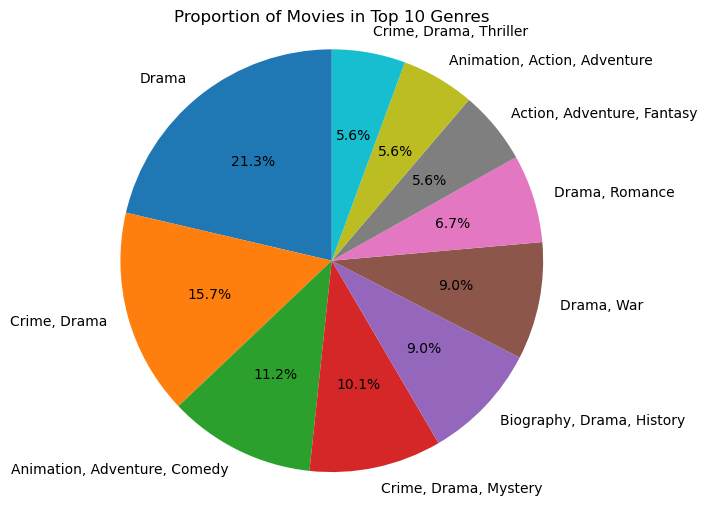

In [9]:
import matplotlib.pyplot as plt

# Calculate the count of movies in each genre
genre_counts = moviedf['genre'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Movies in Top 10 Genres')
plt.show()

### Show the genres by rating
First we group the data by genre, then average the ratings for each genre, to see which genres had the highest ratings and which had the lowest.

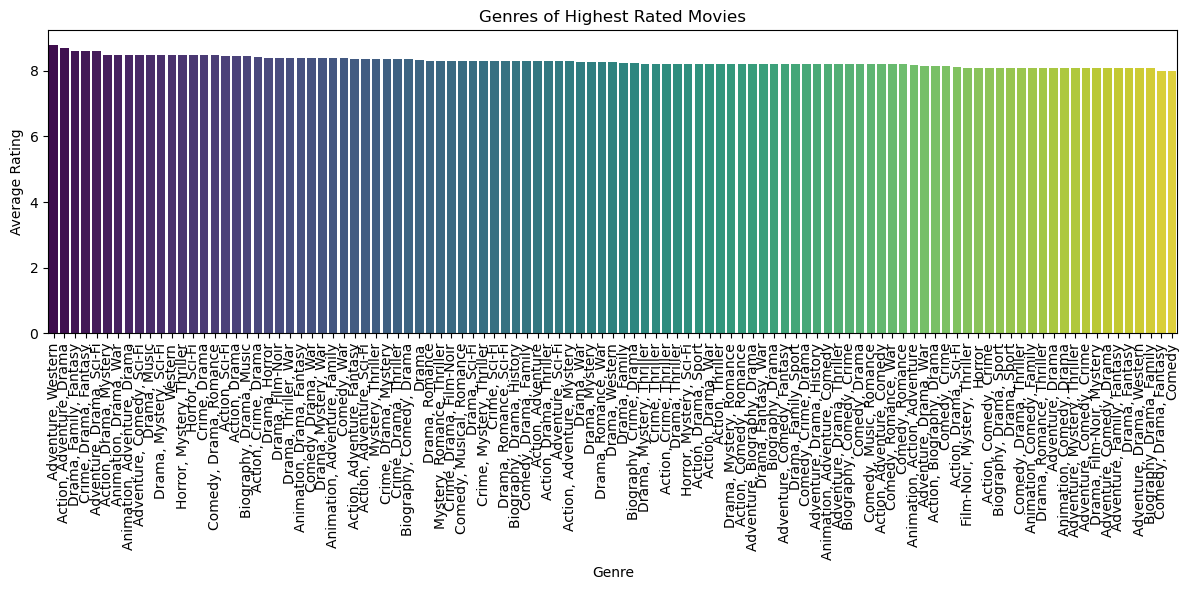

In [10]:
#Group the data by genre and calculate the average rating for each genre
genre_ratings = moviedf.groupby('genre')['rating'].mean().sort_values(ascending=False)

#Plot data
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Genres of Highest Rated Movies')
plt.tight_layout()
plt.show()

From this chart we can see that Adventure, Western is the genre with the highest movie rating average, and comedy is the genre with the lowest average ratings.

### How many times does each genre appear?
The genres are treated as separate entities -- for example, "drama" and "Drama, Comedy" are separate. If we want to see how often drama shows up, we have to create a new dataframe that looks at the genres and splits them into separate strings and creates a new dataframe, one with several rows for each movie where the genres will be separated.

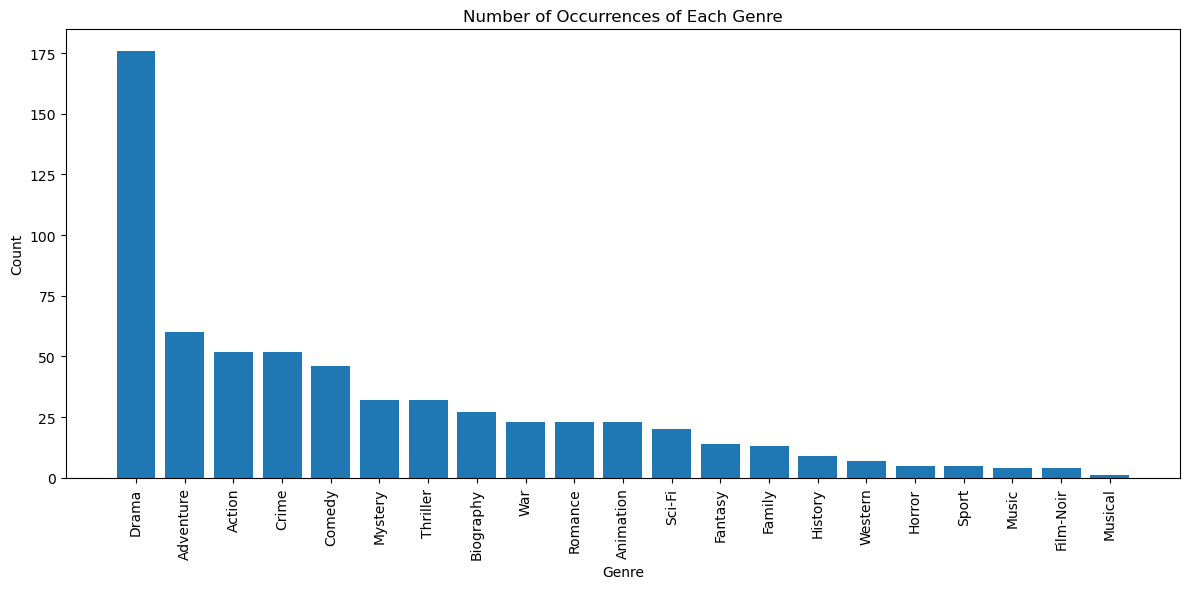

In [11]:
#Split combined genres into individual genres
split_genres = moviedf['genre'].str.split(', ', expand=True).stack()

#Count the occurrences of each individual genre
genre_counts = split_genres.value_counts()

#Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Occurrences of Each Genre')
plt.tight_layout()
plt.show()

### Let's use the csv file exported earlier to create a relational database in SQLite
Unfortunately, there is very sparse data for the ratings table (ratings by age data was removed from IMDB before I could gather much of it) But we still have some, so let's add it to another table:

In [22]:
#create the database using SQLite:
con = lite.connect('imdbratings.db')
    
with con:
    
    cur = con.cursor()
        
    cur.execute("DROP TABLE IF EXISTS ratings")
    cur.execute("DROP TABLE IF EXISTS movies")
        
    cur.execute("""CREATE TABLE movies (
                    movieid INTEGER PRIMARY KEY,
                    imdb_rank INT,
                    movie_title TEXT,
                    year INT,
                    genre TEXT,
                    rating DECIMAL)""")
        
    cur.execute("""CREATE TABLE ratings (
                    ratingid INTEGER PRIMARY KEY, 
                    movie_id INT, 
                    title TEXT, 
                    rating_18_29 DECIMAL, 
                    rating_30_44 DECIMAL, 
                    rating_45 DECIMAL,
                    FOREIGN KEY(movie_id) REFERENCES movies(movieid))""")
    
    
    # Read data from the CSV file and insert into the movies table
    with open('imdb_top_250_movies.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        #skip header row
        next(reader)
        for row in reader:
            try:
                cur.execute("INSERT INTO movies (imdb_rank, movie_title, year, genre, rating) VALUES (?, ?, ?, ?, ?)", row)
                
            except lite.Error as e:
                    print(f"Error inserting row {row}: {e}")
    con.commit()

For the second table in the relational database (the ratings table), Let's use insert statements in SQLite to add data to the table. I'll get the data for each movie for 3 of the age groups IMDB provides: 18-29, 30-44, and 45+ (where available).

In [23]:
#connect to the db and insert the ratings info into the ratings table:
with con:
    
    cur = con.cursor()
        
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (1, 'The Shawshank Redemption', 9.3, 9.3, 9.1)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (2, 'The Godfather', 9.2, 9.2, 9.2)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (3, 'The Dark Knight', 9.3, 9.0, 8.5)")
    cur.execute('INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (4, "Schindler\'s List", 9.1, 9.0, 8.8)')
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (5, 'The Godfather Part II', 9.1, 9.0, 9.0)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (6, '12 Angry Men', 9.2, 9.0, 8.8)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (7, 'The Lord of the Rings: The Return of the King', 9.2, 8.9, 8.7)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (8, 'Pulp Fiction', 8.9, 8.9, 8.8)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (10, 'The Lord of the Rings: The Fellowship of the Ring', 9.0, 8.8, 8.7)")
    cur.execute("INSERT INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (13, 'The Good, the Bad and the Ugly', 8.9, 8.9, 8.7)")

We can also use the same csv file to import the movie id and title for the rest of the movies, and insert NULL values for the ratings by age where that data is missing. We'll skip any movies that we've already entered data for.

In [24]:
with open('imdb_top_250_movies.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    # Skip header row
    next(reader)
    for row in reader:
        try:
            movie_id = int(row[0])
            title = row[1]
            cur.execute("INSERT OR IGNORE INTO ratings (movie_id, title, rating_18_29, rating_30_44, rating_45) VALUES (?, ?, NULL, NULL, NULL)", (movie_id, title))
        except lite.Error as e:
            print(f"Error inserting row {row}: {e}")
con.commit()

Now that we have a SQLite db, we can perform queries on the database.

In [28]:
#Query to select all movies and display ratings data by age where available:
try:
    with con:
        cur = con.cursor()
        cur.execute('SELECT m.movieid AS ID, m.movie_title AS Title, m.year AS Year, m.genre AS Genre, m.rating AS "IMDB Rating", r.rating_18_29 AS "18-29", r.rating_30_44 AS "30-44", r.rating_45 AS "45+" FROM movies m JOIN ratings r ON m.movieid = r.movie_id')
        ratingsdata = cur.fetchall()
        

        print('{:<5s}{:<40s}{:<6s}{:<20s}{:<15s}{:<15s}{:<15s}{:<15s}'.format('ID', 'Title', 'Year', 'Genre', 'IMDB Rating', '18-29', '30-44', '45+'))
        for row in ratingsdata:
            rating_18_29 = '{:<6.1f}'.format(row[5]) if row[5] is not None else "NULL"
            rating_30_44 = '{:<6.1f}'.format(row[6]) if row[6] is not None else "NULL"
            rating_45 = '{:<6.1f}'.format(row[7]) if row[7] is not None else "NULL"
            print('{:<5d}{:<40s}{:<6d}{:<20s}{:<15.1f}{:<15s}{:<15s}{:<15s}'.format(row[0], row[1], row[2], row[3], row[4], rating_18_29, rating_30_44, rating_45))
        
        
except Exception as e:
    print(f"An error occurred: {e}")  

ID   Title                                   Year  Genre               IMDB Rating    18-29          30-44          45+            
1    The Shawshank Redemption                1994  Drama               9.3            9.3            9.3            9.1            
2    The Godfather                           1972  Crime, Drama        9.2            9.2            9.2            9.2            
3    The Dark Knight                         2008  Action, Crime, Drama9.0            9.3            9.0            8.5            
4    Schindler's List                        1993  Biography, Drama, History9.0            9.1            9.0            8.8            
5    The Godfather Part II                   1974  Crime, Drama        9.0            9.1            9.0            9.0            
6    12 Angry Men                            1957  Crime, Drama        9.0            9.2            9.0            8.8            
7    The Lord of the Rings: The Return of the King2003  Action, Adventu

We can make a pandas dataframe with these results to make them display better:

In [29]:
ratingsdf = pd.DataFrame(ratingsdata, columns=['ID', 'Title', 'Year', 'Genre', 'IMDB Rating', '18-29', '30-44', '45+'])
ratingsdf = ratingsdf.fillna('No Data')
print(ratingsdf)

      ID                     Title  Year                         Genre  \
0      1  The Shawshank Redemption  1994                         Drama   
1      2             The Godfather  1972                  Crime, Drama   
2      3           The Dark Knight  2008          Action, Crime, Drama   
3      4          Schindler's List  1993     Biography, Drama, History   
4      5     The Godfather Part II  1974                  Crime, Drama   
..   ...                       ...   ...                           ...   
255  246           The Incredibles  2004  Animation, Action, Adventure   
256  247        Dances with Wolves  1990     Adventure, Drama, Western   
257  248                   Aladdin  1992  Animation, Adventure, Comedy   
258  249             Life of Brian  1979                        Comedy   
259  250             Groundhog Day  1993        Comedy, Drama, Fantasy   

     IMDB Rating    18-29    30-44      45+  
0            9.3      9.3      9.3      9.1  
1            9.2   

Let's write a SQLite query to rank genres by age group rating:

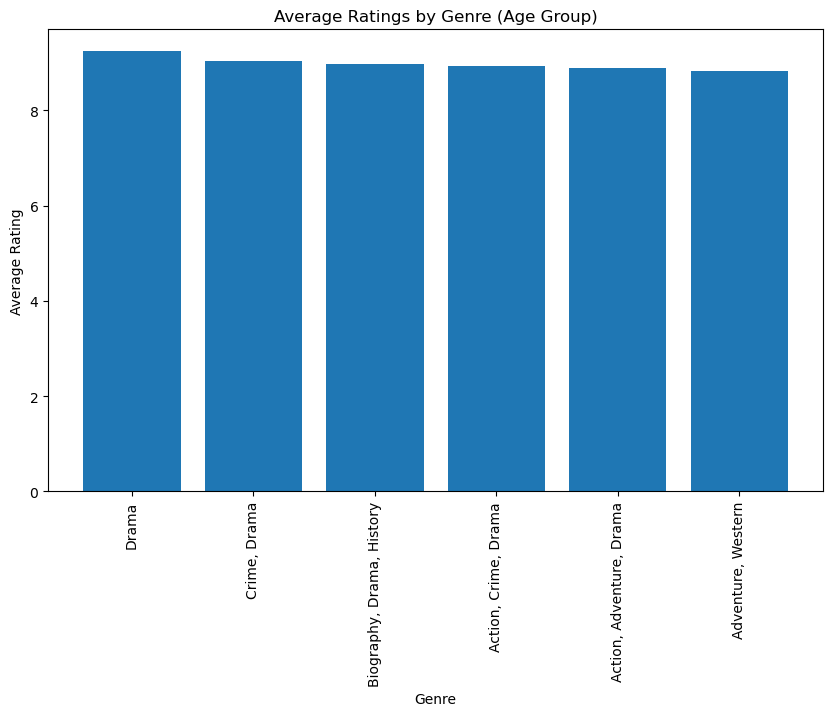

In [55]:
query = '''SELECT m.genre AS Genre, r.rating_18_29 AS "18-29", r.rating_30_44 AS "30-44", r.rating_45 AS "45+"
FROM movies m JOIN ratings r ON m.movieid = r.movie_id'''

# Create a pandas DataFrame from the query result
genrebyagedf = pd.read_sql_query(query, con)

# Group the data by genre and calculate the average rating for each age group
genredf_grouped = genrebyagedf.groupby('Genre').mean().reset_index()

# Sort the genres by the average rating in each age group
genredf_grouped['Average_Rating'] = genredf_grouped[['18-29', '30-44', '45+']].mean(axis=1)
genrebyagedf_sorted = genredf_grouped.sort_values('Average_Rating', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genrebyagedf_sorted['Genre'], genrebyagedf_sorted['Average_Rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre (Age Group)')
plt.xticks(rotation=90)
plt.show()
    


Since we don't have very much data relating to age groups, this is kind of flimsy, but if we had a much larger dataset we could do a lot of fun stuff with this. I probably should have left this out, but I wanted to demonstrate how SQLite can be used with pandas.